Scripts for producing plots shown in Hoyer et al. "Combinatorial selective ER-phagy remodels the ER during neurogenesis" 

doi: https://doi.org/10.1101/2023.06.26.546565 

Plots related to cryo-ET and correlative cryo-FLM analysis

author: capitanio cristina

In [61]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import matplotlib.font_manager

In [70]:
#import autophagosome and tomogram data

df_AP = pd.read_csv('../cryoET_source_data_autophagosomes.csv')

df_tomo =pd.read_csv('../cryoET_source_data_tomograms.csv')

Plotting autophagosomes annotations counts - cargo tubules, proximity to microtubules and TEX264 signal 

In [57]:
#Count autophagosomes 

AP_tot= len(df_AP)
AP_tub = (df_AP['cargo_tubules'] == 'y').sum()
AP_notub = (df_AP['cargo_tubules'] == 'n').sum()

AP_mt = (df_AP['microtubule_linked'] == 'y').sum()
AP_nomt = (df_AP['microtubule_linked'] == 'n').sum()

AP_TEX264 = (df_AP['TEX264_signal'] == 'y').sum()
AP_noTEX = (df_AP['TEX264_signal'] == 'n').sum()

df_tub = df_AP[df_AP['cargo_tubules'] == 'y']
df_notub = df_AP[df_AP['cargo_tubules'] == 'n']

AP_tubmt = (df_tub['microtubule_linked'] == 'y').sum()
AP_notubmt = AP_tot - AP_tubmt

AP_tubTEX = (df_tub['TEX264_signal'] == 'y').sum()
AP_notubTEX = (df_notub['TEX264_signal'] == 'y').sum()

df_TEX = df_AP[df_AP['TEX264_signal']=='y']
AP_TEXmt = (df_TEX['microtubule_linked']=='y').sum()
AP_TEXnomt = (df_TEX['microtubule_linked']=='n').sum()
            
print('N =', AP_tub, ' autophagosomes contain cargo tubules, N =',AP_mt, ' are linked to microtubules (within 20 nm distance), N =', AP_TEX264, ' coincide with TEX264 signal.' )
print('The number of autophagosomes with cargo tubules contacting microtubules is N =', AP_tubmt)
print('N =', AP_tubTEX, ' autophagosomes containing cargo tubules coincide with TEX264, N =',AP_notubTEX, 'autophagosome NOT containing cargo tubules coincide with TEX264')

37
N = 21  autophagosomes contain cargo tubules, N = 24  are linked to microtubules (within 20 nm distance), N = 5  coincide with TEX264 signal.
The number of autophagosomes with cargo tubules contacting microtubules is N = 14
N = 5  autophagosomes containing cargo tubules coincide with TEX264, N = 0 autophagosome NOT containing cargo tubules coincide with TEX264


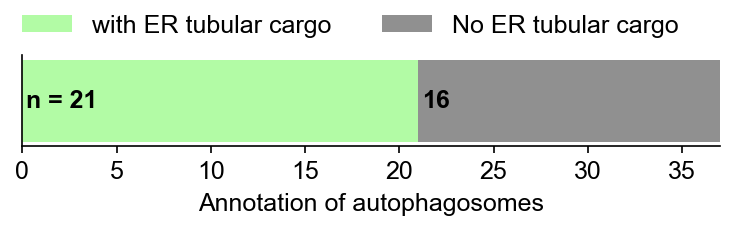

In [38]:
# Plot counts of autophagosomes containing cargo tubules

plt.rcParams['font.sans-serif'] ='Arial'
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 12


fig,ax = plt.subplots(dpi=150, figsize=(6, 0.8))
labels =['with ER tubular cargo', 'No ER tubular cargo']
data = [AP_tub, AP_notub]
index = [0, 1]
colors=['#B2FBA5', '#909090']
name='Annotation of autophagosomes'

cum_sum = np.array([0])
for i in index:
    values = data[i]
    ax.barh(name, values, label=labels[i], left = cum_sum, color=colors[i])
    axtext = values.astype(int)
    if i == 0:
        axtext = f'n = {values.astype(int)}'
    ax.text(cum_sum+0.2, 0, axtext, color='black', va='center', fontweight='bold', fontsize =12)
    cum_sum = cum_sum + values

leg = ax.legend(loc='lower left', bbox_to_anchor=(0,1.2), ncol=3, frameon=False, 
                borderpad=0, borderaxespad=0, fontsize =12)
leg._legend_box.align = "left"    
    

ax.set_xlabel( name, fontsize = 12)
ax.set_xlim([0,cum_sum])
ax.yaxis.set_visible(False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.show()


save_fig=False

if save_fig:
    fig.savefig('../example.pdf', dpi=300, bbox_inches='tight', transparent=True)


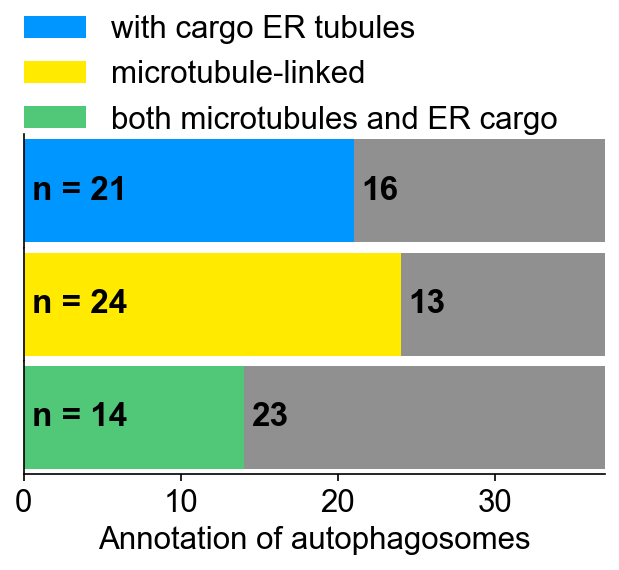

In [50]:
#Plot 

plt.rcParams['font.sans-serif'] ='Arial'
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 15


fig  = plt. figure(dpi=150, figsize=(5, 3))
gs = fig.add_gridspec(3, hspace=0)
ax = gs.subplots()

labels_1 =['with cargo ER tubules', '']
data_1 = [AP_tub, AP_notub]
index = [0, 1]

labels_2 = ['microtubule-linked', '']
data_2 = [AP_mt, AP_nomt]

labels_3 = ['both microtubules and ER cargo', '']
data_3 =[AP_tubmt, AP_notubmt]

colors_1=[ '#0096FF' , '#909090']
colors_2=[ '#FFEA00', '#909090']
colors_3=[ '#50C878', '#909090']
name = ' Annotation of autophagsomes '

cum_sum = np.array([0])
for i in index:
    values = data_1[i]
    ax[0].barh(name, values, label=labels_1[i], left = cum_sum, color=colors_1[i])
    axtext = values.astype(int)
    if i == 0:
        axtext = f'n = {values.astype(int)}'
    ax[0].text(cum_sum+0.5, 0, axtext, color='black', va='center', fontweight='bold', fontsize =16)
    cum_sum = cum_sum + values

cum_sum = np.array([0])
for i in index:
    values = data_2[i]
    ax[1].barh(name, values, label=labels_2[i], left = cum_sum, color=colors_2[i])
    axtext = values.astype(int)
    if i == 0:
        axtext = f'n = {values.astype(int)}'
    ax[1].text(cum_sum+0.5, 0, axtext, color='black', va='center', fontweight='bold', fontsize =16)
    cum_sum = cum_sum + values
    
    
cum_sum = np.array([0])
for i in index:
    values = data_3[i]
    ax[2].barh(name, values, label=labels_3[i], left = cum_sum, color=colors_3[i])
    axtext = values.astype(int)
    if i == 0:
        axtext = f'n = {values.astype(int)}'
    ax[2].text(cum_sum+0.5, 0, axtext, color='black', va='center', fontweight='bold', fontsize =16)
    cum_sum = cum_sum + values
    
leg1 = ax[0].legend(loc='lower left', bbox_to_anchor=(0,1.8), ncol=3, frameon=False, 
                borderpad=0, borderaxespad=0, fontsize =15)
leg2 = ax[1].legend(loc='lower left', bbox_to_anchor=(0,2.4), ncol=3, frameon=False, 
                borderpad=0, borderaxespad=0, fontsize =15)
leg3 = ax[2].legend(loc='lower left', bbox_to_anchor=(0,3), ncol=3, frameon=False, 
                borderpad=0, borderaxespad=0, fontsize =15)


leg1._legend_box.align = "left"    
    
#ax.axis('off')
    
ax[2].set_xlabel("Annotation of autophagosomes", fontsize = 15)

ax[0].set_xlim([0,cum_sum])
ax[1].set_xlim([0,cum_sum])
ax[2].set_xlim([0,cum_sum])

ax[0].set_ylabel('cargo tubules', fontsize = 10)
ax[1].set_ylabel('microtubules', fontsize = 10)
ax[2].set_ylabel('both', fontsize = 10)

ax[0].yaxis.set_visible(False)
ax[1].yaxis.set_visible(False)
ax[2].yaxis.set_visible(False)

ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[2].spines['right'].set_visible(False)

ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[2].spines['top'].set_visible(False)

ax[0].spines['bottom'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[2].spines['bottom'].set_visible(True)

ax[0].xaxis.set_visible(False)
ax[1].xaxis.set_visible(False)
ax[2].xaxis.set_visible(True)

plt.show()


save_fig=False

if save_fig:
    fig.savefig('../example.pdf', dpi=300, bbox_inches='tight', transparent=True)

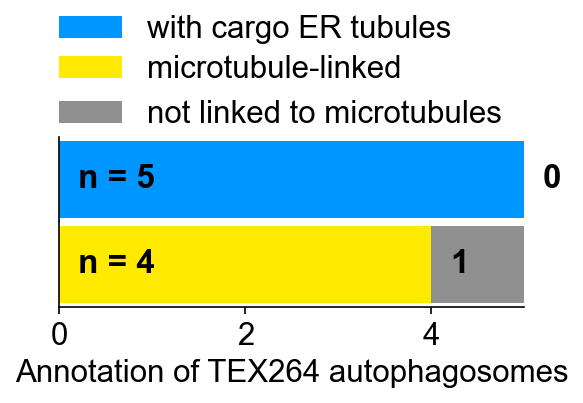

In [59]:
plt.rcParams['font.sans-serif'] ='Arial'
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 15


#Add 3 subplot axis
fig  = plt. figure(dpi=150, figsize=(4, 1.5))
gs = fig.add_gridspec(2, hspace=0)
ax = gs.subplots()

labels_1 =['with cargo ER tubules', '']
data_1 =  [AP_tubTEX, AP_notubTEX]
index = [0, 1]

labels_2 = ['microtubule-linked', 'not linked to microtubules']
data_2 = [AP_TEXmt, AP_TEXnomt]

colors_1=[ '#0096FF' , '#909090']
colors_2=[ '#FFEA00', '#909090']
name = ' '

cum_sum = np.array([0])
for i in index:
    values = data_1[i]
    ax[0].barh(name, values, label=labels_1[i], left = cum_sum, color=colors_1[i])
    axtext = values
    if i == 0:
        axtext = f'n = {values}'
    ax[0].text(cum_sum+0.2, 0, axtext, color='black', va='center', fontweight='bold', fontsize =16)
    cum_sum = cum_sum + values

cum_sum = np.array([0])
for i in index:
    values = data_2[i]
    ax[1].barh(name, values, label=labels_2[i], left = cum_sum, color=colors_2[i])
    axtext = values
    if i == 0:
        axtext = f'n = {values}'
    ax[1].text(cum_sum+0.2, 0, axtext, color='black', va='center', fontweight='bold', fontsize =16)
    cum_sum = cum_sum + values
    
    
leg1 = ax[0].legend(loc='lower left', bbox_to_anchor=(0,2.1), ncol=3, frameon=False, 
                borderpad=0, borderaxespad=0, fontsize =15)
leg2 = ax[1].legend(loc='lower left', bbox_to_anchor=(0,2.1), ncol=1, frameon=False, 
                borderpad=0, borderaxespad=0, fontsize =15)

leg1._legend_box.align = "left"    
    
ax[1].set_xlabel("Annotation of TEX264 autophagosomes", fontsize = 15)

ax[0].set_xlim([0,cum_sum])
ax[1].set_xlim([0,cum_sum])


ax[0].set_ylabel('cargo tubules', fontsize = 10)
ax[1].set_ylabel('microtubules', fontsize = 10)


ax[0].yaxis.set_visible(False)
ax[1].yaxis.set_visible(False)


ax[0].spines['right'].set_visible(False)
ax[1].spines['right'].set_visible(False)


ax[0].spines['top'].set_visible(False)
ax[1].spines['top'].set_visible(False)


ax[0].spines['bottom'].set_visible(False)
ax[0].xaxis.set_visible(False)
#ax[1].spines['top'].set_visible(False)

plt.show()




Plotting tomogram thickness

In [71]:
df_tomo.head()

,tomo_ID,correlation_check,TEX264_signal,number_of_autophagic_structures,tomo_thickness_nm
0,2,y,n,1,517
1,3,y,n,1,311
2,11,y,y,1,406
3,12,y,n,2,588
4,13,y,n,1,592


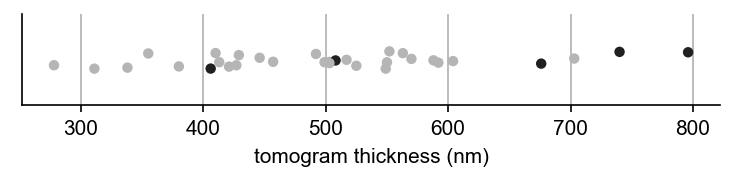

In [73]:
#Plot tomo thickness
plt.rcParams['font.sans-serif'] ='Arial'
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['font.size'] = 10


fig = plt.figure(dpi=150, figsize=(6, 0.8))
plt.grid()

data1 = df_tomo['tomo_thickness_nm']
hue1 = df_tomo['TEX264_signal']

index = [0, 1, 2]
colors=['#b5b5b5', '#202020']
name = ' '

ax = sns.stripplot(data=df_tomo, x='tomo_thickness_nm',y='correlation_check', hue ='TEX264_signal', palette = colors ) #range = (200, 800))

leg = ax.legend([],[], frameon =False)

ax.set_xlabel("tomogram thickness (nm)", fontsize = 10)
ax.set_ylabel("counts", fontsize = 5)
ax.yaxis.set_visible(False)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.show()

save_fig=False

if save_fig:
    fig.savefig('../example.pdf', dpi=300, bbox_inches='tight', transparent=True)
